# Titanic Disaster Analysis and Visualization

In [138]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

In [3]:
titanic = pd.read_csv('data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


## Female and Male comparision on Titanic

C:\Users\quantum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


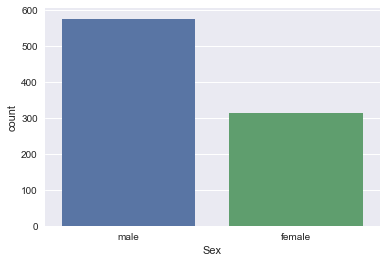

In [13]:
sns.countplot(titanic['Sex'])

## Male and Female in Pclass

C:\Users\quantum\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


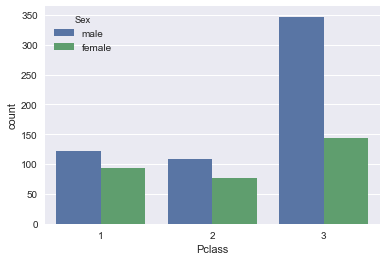

In [15]:
sns.countplot(titanic['Pclass'], hue=titanic['Sex'])

## Anyone under 16 years is considered as Child

In [16]:
def child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

titanic['person'] = titanic[['Age', 'Sex']].apply(child,axis=1)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


## Male, Female, Child in Pclass

C:\Users\quantum\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


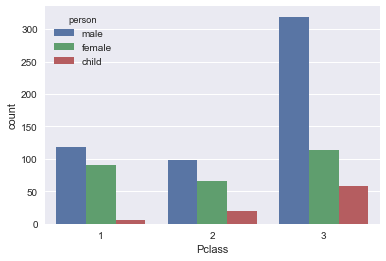

In [20]:
sns.countplot(titanic['Pclass'], hue=titanic['person'])

In [21]:
titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

## Removing Null Values from Cabin

In [22]:
deck = titanic["Cabin"].dropna()

In [23]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

C:\Users\quantum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


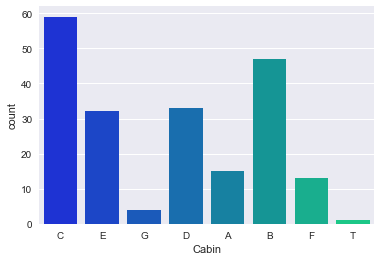

In [32]:
levels_list = []
for level in deck:
    levels_list.append(level[0])
cabin = DataFrame(levels_list)
cabin.columns = ['Cabin']
sns.countplot('Cabin',data=cabin,palette='winter')

## Comparision of Pclass and Embarked

C:\Users\quantum\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


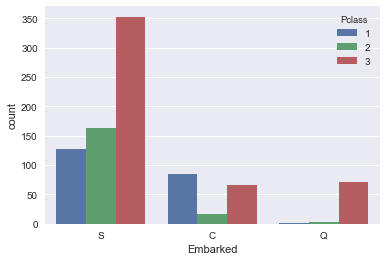

In [35]:
sns.countplot('Embarked',data=titanic,hue='Pclass')

## Seperating Family and Alone

In [45]:
titanic["Alone"].loc[titanic["Alone"] != 0] = 'With Family'
titanic["Alone"].loc[titanic["Alone"] == 0] = 'Alone'

C:\Users\quantum\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


## Plotting Alone and With Family Members

C:\Users\quantum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


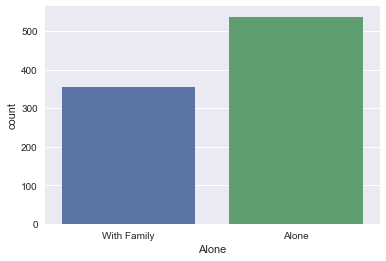

In [47]:
sns.countplot('Alone',data=titanic)

## People Who Survived and Who Didn't

C:\Users\quantum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


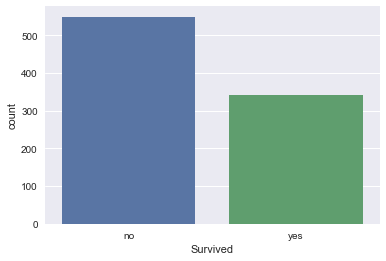

In [48]:
titanic["Survived"] = titanic.Survived.map({0: "no", 1: "yes"})
sns.countplot('Survived',data=titanic)

## Percentage of People who survived and who Didn't

In [56]:
no, yes = titanic['Survived'].value_counts(normalize=True) * 100

In [60]:
print('no\t:', no)
print('yes\t:', yes)

no	: 61.61616161616161
yes	: 38.38383838383838


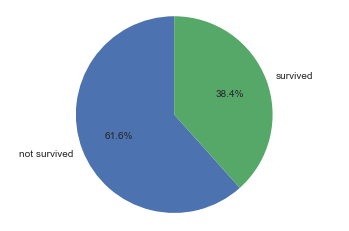

In [76]:
labels = 'not survived', 'survived'
sizes = [no, yes]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## How many Male and Female Survived the titanic

In [79]:
titanic[['Survived','Age']].head()

,Survived,Age
0,no,22.0
1,yes,38.0
2,yes,26.0
3,yes,35.0
4,no,35.0


(array([0, 1]), <a list of 2 Text yticklabel objects>)

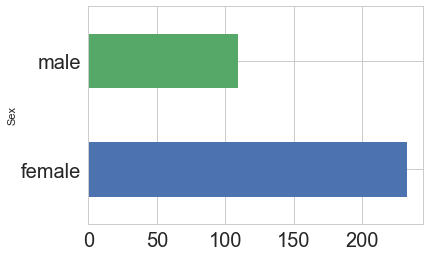

In [84]:
survived_yes = pd.crosstab(titanic.Sex,titanic.Survived)
survived_yes['yes'].plot.barh()
plt.xticks(size = 20)
plt.yticks(size = 20)

(array([0, 1]), <a list of 2 Text yticklabel objects>)

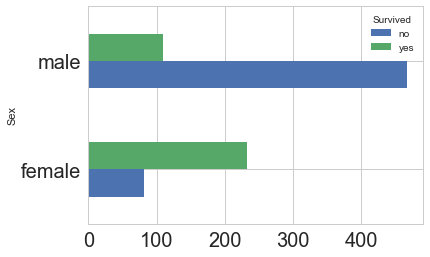

In [85]:
Survived_all = pd.crosstab(titanic.Sex,titanic.Survived)
Survived_all.plot.barh()
plt.xticks(size = 20)
plt.yticks(size = 20)

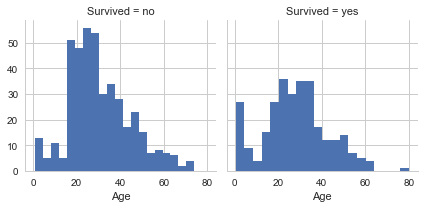

In [88]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## Pclass and Survived

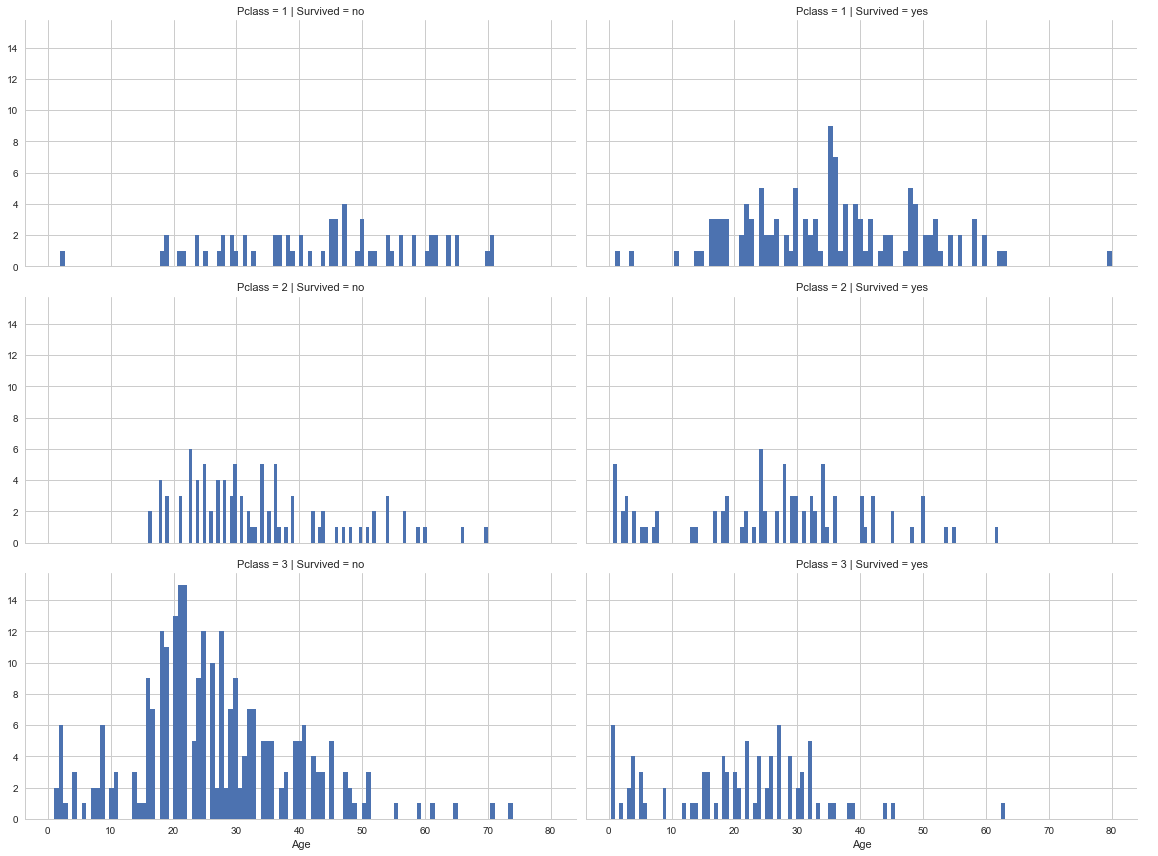

In [127]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=4, aspect=2)
grid.map(plt.hist, 'Age', bins=100)
grid.add_legend();

## Relation Between Pclass and Embarked

Text(0.5,1,'Relation Between Pclass and Embarked')

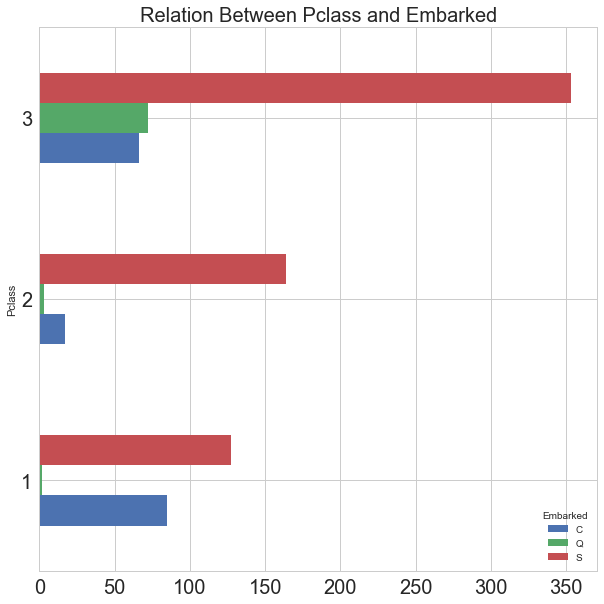

In [128]:
relation = pd.crosstab( titanic.Pclass, titanic.Embarked )
relation.plot.barh(figsize=(10,10))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title('Relation Between Pclass and Embarked',size=20)

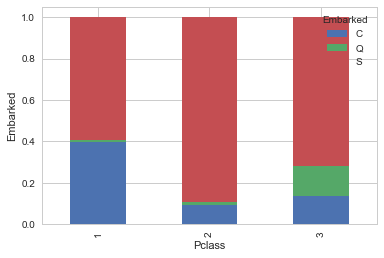

In [129]:
dummy = relation.div(relation.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Embarked')

## Sex and Pclass Relation

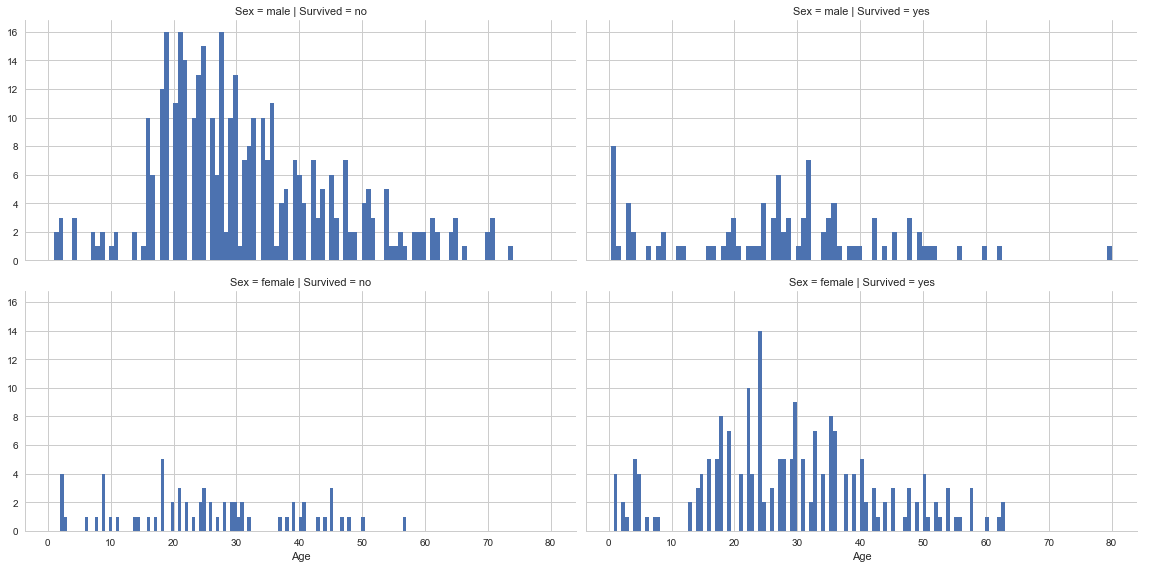

In [132]:
grid = sns.FacetGrid(titanic, col='Survived', row='Sex', size=4, aspect=2)
grid.map(plt.hist, 'Age', bins=100)
grid.add_legend();

## People who survived in Pclas

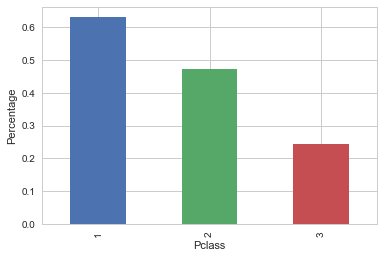

In [133]:
tab = pd.crosstab(titanic['Pclass'], titanic['Survived'])
dummy = tab['yes'].div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

Survived   no  yes
Pclass            
1          80  136
2          97   87
3         372  119


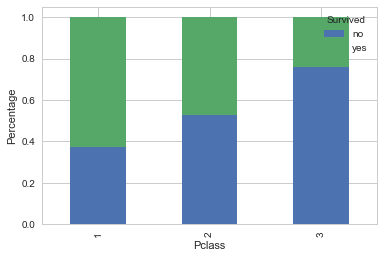

In [134]:
tab = pd.crosstab(titanic['Pclass'], titanic['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

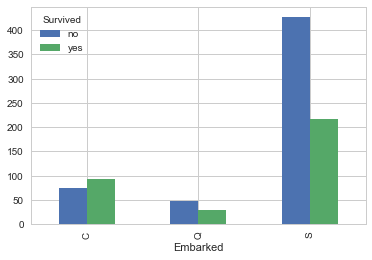

In [135]:
embarked_sur = pd.crosstab(titanic.Embarked,titanic.Survived)
embarked_sur.plot.bar()

## Null values

In [136]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
person           0
Alone            0
dtype: int64


## remove all nulls in Age

In [139]:
age_avg = titanic['Age'].mean()
age_std = titanic['Age'].std()
age_null_count = titanic['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
titanic['Age'][np.isnan(titanic['Age'])] = age_null_random_list
titanic['Age'] = titanic['Age'].astype(int)

In [140]:
titanic['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int32

## visualization again

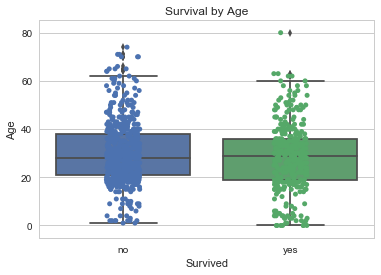

In [148]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="gray")
sns.plt.title("Survival by Age",fontsize=12);

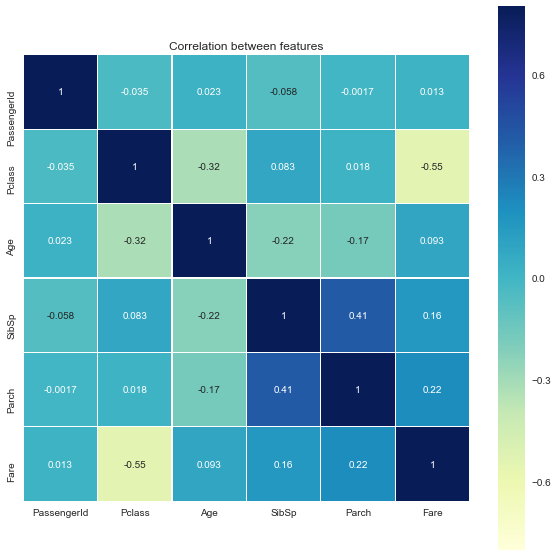

In [149]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

## Thank You